<a href="https://colab.research.google.com/github/JJungEEun/Optimization_of_DemandResponseBus_Routes/blob/main/%EC%A0%95%EB%A5%98%EC%9E%A5_%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
s_pass = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/인천광역시_정류장별 이용승객 현황_20220430.csv", encoding='cp949')

In [ ]:
pop = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/인천광역시_읍면동별 세대 및 인구 현황_20200630.csv",encoding='cp949')
work = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/산업별_동별_사업체수_및_종사자수_20220609211500.csv",encoding='cp949')

In [ ]:
busstop = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/인천광역시_시내버스 정류소 현황_20220516.csv",encoding='cp949')

# data preprocessing

## Merge Data

In [ ]:
busstop['정류소ID'] = busstop['정류소 번호']

In [ ]:
data = pd.merge(s_pass, busstop, on ='정류소ID')[['권역_x', '행정동 명', '정류소명', '정류소ID', '승차건수(총합계)', '하차건수(총합계)', '승차건수(카드)',
       '하차건수(카드)', '승차건수(현금)', '일평균 승하차건수','X 좌표', '위도', 'Y 좌표', '경도']]
data.head()

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도
0,중구,연안동,(구)국제여객터미널,35051.0,86,1550,7,1550,79,55,164336.1312,126.597726,439026.3601,37.452707
1,중구,연안동,(구)국제여객터미널,35052.0,2221,42,2178,42,43,75,164354.2093,126.597932,438993.8440,37.452415
2,미추홀구,주안4동,(구)시민회관사거리,37319.0,7866,56698,7732,56698,134,2152,171634.3433,126.680188,439514.7790,37.457360
3,미추홀구,주안2동,(구)시민회관사거리,37326.0,78529,16782,77529,16782,1000,3177,171611.3811,126.679927,439559.9220,37.457766
4,서구,가정1동,(구)신현주공,42228.0,4540,5758,4347,5758,193,343,171058.1950,126.673395,446673.6356,37.521843


In [ ]:
data['행정동 명'].unique()

array(['연안동', '주안4동', '주안2동', '가정1동', '산곡3동', '오류왕길동', '가좌1동', '석남2동',
       '남촌도림동', '논현고잔동', '주안5동', '십정1동', '원찬동', '원창동', '일신동', '검단1동',
       '부평3동', '신현원창동', '송현3동', '만수3동', '도화23동', '북성동', '신흥동', '걸포동',
       '원당동', '불로대곡동', '청천2동', '송현1동2동', '영흥면', '만수4동', '주안1동', '당하동',
       '소하2동', '산곡4동', '연희동', '옥련1동', '길상면', '운서동', '주안6동', '만수5동', '중1동',
       '검암경서동', '영종동', '장기동', '중산동', '용현2동', '청라3동', '용현5동', '석남1동',
       '송도4동', '효성2동', '효성1동', '영종1동', '운영동', '가정동', '불은면', '양도면', '가좌2동',
       '가양2동', '양촌면', '가좌4동', '가좌3동', '가정3동', '석남3동', '연수3동', '하점면',
       '간석2동', '간석4동', '간석1동', '구월2동', '간석3동', '간석동', '화도면', '갈산2동',
       '삼산1동', '갈산1동', '계양1동', '강화읍', '역삼1동', '서초2동', '양사면', '송월동',
       '방화제2동', '방화2동', '운북동', '용유동', '만수1동', '동춘1동', '북변동', '아라동', '마전동',
       '대곡동', '선원면', '감정동', '산곡2동', '청라2동', '계산2동', '계산1동', '학익1동',
       '송도2동', '부개1동', '계산3동', '계산동', '작전서운동', '계산4동', '계양3동', '작전2동',
       '계양2동', '작전1동', '귤현동', '교동면', '내가면', '반포3동', '김포2동', '고촌면', '정왕4동',
    

- 영종도 지역 데이터 추출

In [ ]:
data1 = data[ data['행정동 명']== '운서동']
data2 = data[ data['행정동 명']== '영종동']
data3 = data[ data['행정동 명']== '중산동'] 
data4 = data[ data['행정동 명']== '영종1동']

In [ ]:
data1['정류장수'] = 1
data1['총세대수'] =  16629
data1['사업체수'] = 2341
data1['종사자수'] = 44269

data1.head()

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수,총세대수,사업체수,종사자수
61,중구,운서동,KT인천공항지사,35095.0,324,84,314,84,10,14,154875.6093,126.490541,443406.8490,37.491760,1,16629,2341,44269
62,중구,운서동,KT인천공항지사,35109.0,7863,2975,7372,2975,491,361,154855.7604,126.490305,443588.4114,37.493395,1,16629,2341,44269
352,중구,운서동,거잠포회센터(미정차),35858.0,1,0,1,0,0,0,149110.9665,126.425879,435885.1701,37.423693,1,16629,2341,44269
688,중구,운서동,공항고등학교,35116.0,3183,416,2920,416,263,120,154413.6324,126.485277,444047.0321,37.497505,1,16629,2341,44269
690,중구,운서동,공항교회앞,35123.0,1082,1828,1067,1828,15,97,154616.5700,126.487550,444400.4681,37.500699,1,16629,2341,44269


In [ ]:
data2['정류장수'] = 1
data2['총세대수'] =  8306
data2['사업체수'] = 975
data2['종사자수'] = 3526

data2.head()

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수,총세대수,사업체수,종사자수
72,중구,영종동,LH1단지,35494.0,6547,3316,6404,3316,143,329,155682.0866,126.499715,442495.9784,37.483592,1,8306,975,3526
74,중구,영종동,LH1단지,35495.0,3115,4109,2970,4109,145,241,155691.0105,126.499817,442478.3429,37.483434,1,8306,975,3526
77,중구,영종동,LH7단지,35451.0,2372,2395,2315,2395,57,159,160116.7985,126.549847,442619.6288,37.484909,1,8306,975,3526
78,중구,영종동,LH7단지,35452.0,2875,2763,2775,2763,100,188,160135.6887,126.550059,442644.6582,37.485135,1,8306,975,3526
102,중구,영종동,e편한세상1차(정문),35662.0,581,1226,547,1226,34,60,156827.2761,126.512700,441845.8464,37.477789,1,8306,975,3526


In [ ]:
data3['정류장수'] = 1
data3['총세대수'] =  16185
data3['사업체수'] = 632
data3['종사자수'] = 2504

data3.head()

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수,총세대수,사업체수,종사자수
75,중구,중산동,LH49단지행복주택아파트,35768.0,494,715,491,715,3,40,162007.2486,126.571172,443570.6634,37.493557,1,16185,632,2504
76,중구,중산동,LH49단지행복주택아파트,35769.0,1167,787,1145,787,22,65,161973.9185,126.570794,443592.9949,37.493757,1,16185,632,2504
4159,중구,중산동,영종블루오션,35819.0,172,106,169,106,3,9,161254.8727,126.562702,442855.2132,37.487080,1,16185,632,2504
4160,중구,중산동,영종블루오션,35820.0,44,379,44,379,0,14,161217.6075,126.562282,442826.3842,37.486818,1,16185,632,2504
4161,중구,중산동,영종선착장입구,35833.0,1650,1347,1597,1347,53,100,162602.8207,126.577913,443427.5029,37.492292,1,16185,632,2504


In [ ]:
B = pd.concat([data1, data2, data3])
b = B.sort_values('일평균 승하차건수', ascending=False)[:100]
b =  b.groupby(['정류소명'])['승차건수(총합계)','하차건수(총합계)','일평균 승하차건수','위도','경도','총세대수','사업체수','종사자수'].mean()
b = b.reset_index()

- 인천공항 제외 정류장 분포 확인

In [ ]:
b = b[~b['정류소명'].str.contains("인천공항", na=False, case=False)]
b = b.reset_index(drop=True)
# b = b.sort_values('총세대수', ascending=False)[:100]

In [ ]:
b.head()

,정류소명,승차건수(총합계),하차건수(총합계),일평균 승하차건수,위도,경도,총세대수,사업체수,종사자수
0,LH1단지,4831.0,3712.5,285.0,126.499766,37.483513,8306.0,975.0,3526.0
1,LH7단지,2623.5,2579.0,173.5,126.549953,37.485022,8306.0,975.0,3526.0
2,e편한세상1차(정문),1800.0,431.0,74.0,126.512415,37.478014,8306.0,975.0,3526.0
3,공항고등학교,3183.0,416.0,120.0,126.485277,37.497505,16629.0,2341.0,44269.0
4,공항교회앞,1082.0,1828.0,97.0,126.487550,37.500699,16629.0,2341.0,44269.0


# data visualization


## 상위 100개 데이터 시각화 
- 승차건수, 하차건수, 총세대수, 사업체수, 종사자수

In [ ]:
b1 = b[:23]
b2 = b[23:]

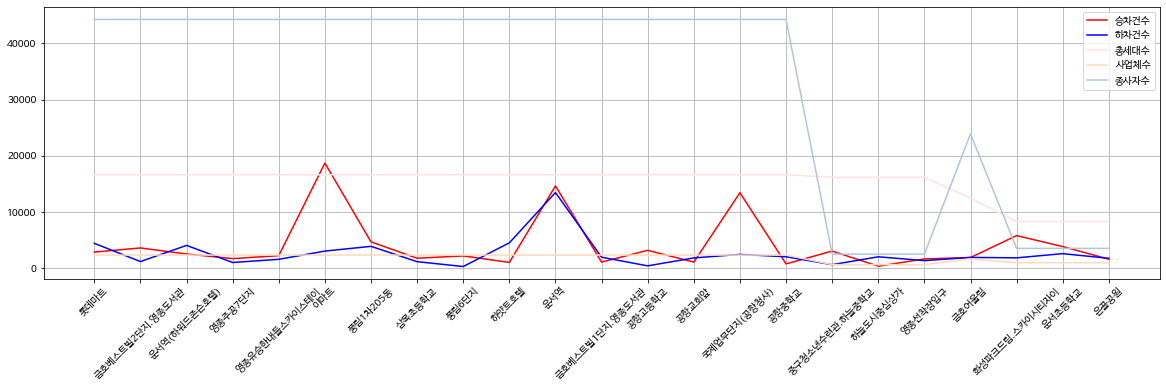

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot()

plt.plot(b1['정류소명'], b1['승차건수(총합계)'], color='red', label='승차건수')
plt.plot(b1['정류소명'], b1['하차건수(총합계)'], color='blue', label='하차건수')
plt.plot(b1['정류소명'], b1['총세대수'], color='mistyrose',label='총세대수')
plt.plot(b1['정류소명'], b1['사업체수'], color='peachpuff',label='사업체수')
plt.plot(b1['정류소명'], b1['종사자수'], color='lightsteelblue',label='종사자수')
plt.legend()

plt.xticks(rotation =45)
plt.grid(True)

plt.show()

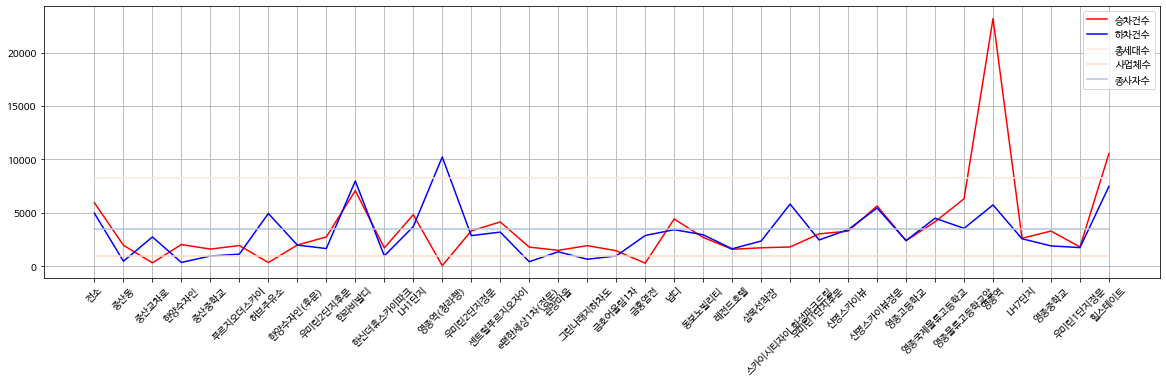

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot()

plt.plot(b2['정류소명'], b2['승차건수(총합계)'], color='red', label='승차건수')
plt.plot(b2['정류소명'], b2['하차건수(총합계)'], color='blue', label='하차건수')
plt.plot(b2['정류소명'], b2['총세대수'], color='mistyrose',label='총세대수')
plt.plot(b2['정류소명'], b2['사업체수'], color='peachpuff',label='사업체수')
plt.plot(b2['정류소명'], b2['종사자수'], color='lightsteelblue',label='종사자수')
plt.legend()

plt.xticks(rotation =45)
plt.grid(True)

plt.show()

In [ ]:
bus_yj_.columns

Index(['권역_x', '행정동 명', '정류소명', '정류소ID', '승차건수(총합계)', '하차건수(총합계)', '승차건수(카드)',
       '하차건수(카드)', '승차건수(현금)', '일평균 승하차건수', 'X 좌표', '위도', 'Y 좌표', '경도'],
      dtype='object')

## 정류장 접근성 확인

In [ ]:
bus_yj_ = pd.concat([data1, data2, data3, data4])
bus_yj.head()

,권역,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,정류장수
0,중구,KT인천공항지사,35095,324,84,314,84,10,14,1
1,중구,KT인천공항지사,35109,7863,2975,7372,2975,491,361,1
2,중구,LH1단지,35494,6547,3316,6404,3316,143,329,1
3,중구,LH1단지,35495,3115,4109,2970,4109,145,241,1
4,중구,LH49단지행복주택아파트,35768,494,715,491,715,3,40,1


In [ ]:
bus_yj_['정류장수'] = 1
bus_yj =  bus_yj_.groupby(['정류소명'])['승차건수(총합계)','하차건수(총합계)','일평균 승하차건수','정류장수'].sum()
bus_yj['승하차건수(총합계)'] = bus_yj['승차건수(총합계)']+ bus_yj['하차건수(총합계)']
bus_yj = bus_yj.reset_index()
bus_yj

,정류소명,승차건수(총합계),하차건수(총합계),일평균 승하차건수,정류장수,승하차건수(총합계)
0,KT인천공항지사,8187,3059,375,2,11246
1,LH1단지,9662,7425,570,2,17087
2,LH49단지행복주택아파트,1661,1502,105,2,3163
3,LH7단지,5247,5158,347,2,10405
4,e편한세상1차(정문),2381,1657,134,2,4038
...,...,...,...,...,...,...
185,호수마을5단지후문,16,43,2,1,59
186,화물터미널,185,254,14,2,439
187,화성파크드림.스카이시티자이,5799,1843,255,1,7642
188,화성파크드림후문.한라비발디,591,824,47,1,1415


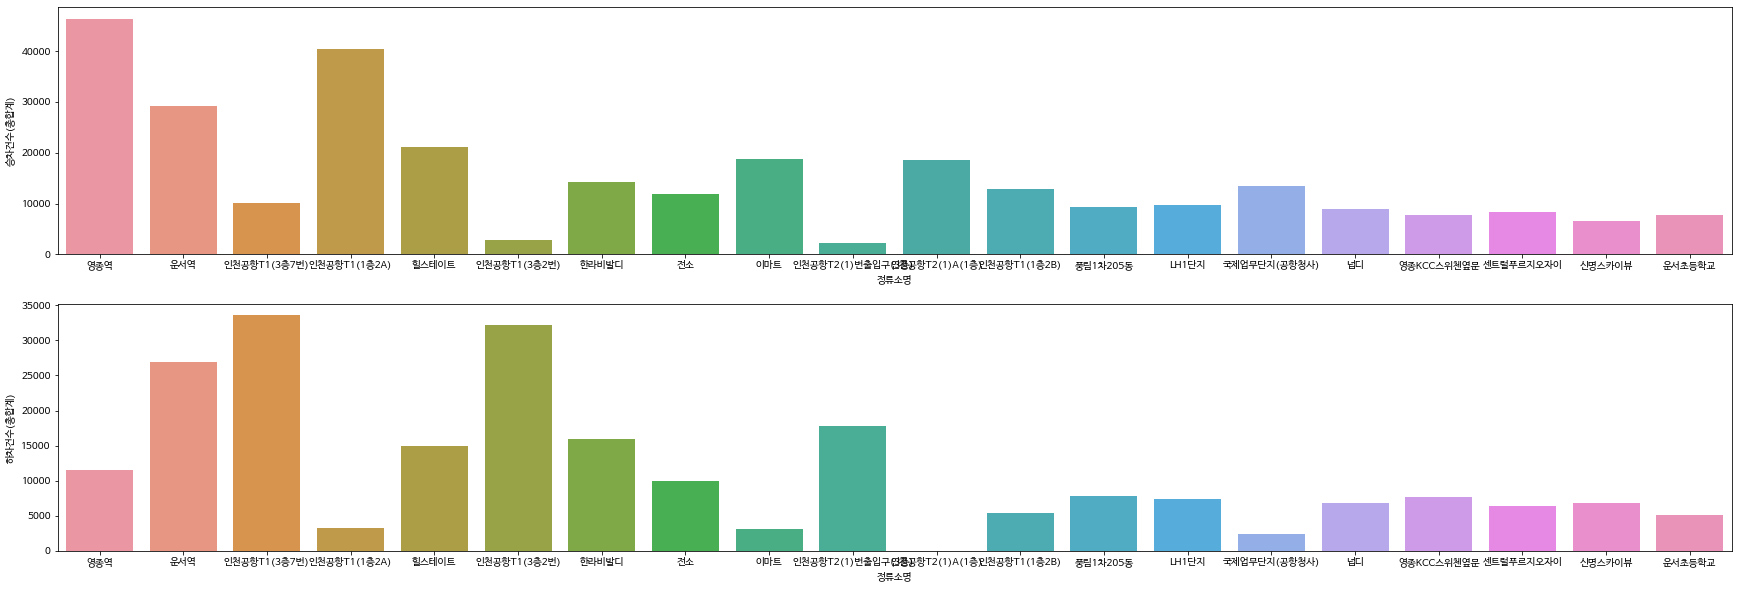

In [ ]:
col_n = 1
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))
data= bus_yj.sort_values('승하차건수(총합계)', ascending=False)[:20]

col = ["승차건수(총합계)","하차건수(총합계)"]
for i,col in enumerate(data[col]): 
  sns.barplot(x=data["정류소명"], y=data[col], ax=ax[int(i)])

# 지도 시각화

## 정류장 승하차 상위 20

In [ ]:
top20_up = bus_yj_.sort_values('승차건수(총합계)', ascending=False)[:20]
top20_up = top20_up.reset_index(drop=True)
top20_up

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도
0,중구,영종동,인천공항T1(1층2A),35344.0,40354,3260,39938,3260,416,1454,151599.2996,126.453803,438722.0012,37.449385
1,중구,영종동,영종역,35566.0,33040,598,32604,598,436,1121,157859.8240,126.524154,445680.9062,37.512390
2,중구,운서동,운서역,35242.0,22128,12853,21762,12853,366,1166,155098.7629,126.493049,443647.3451,37.493938
3,중구,운서동,이마트,35207.0,18710,3045,18584,3045,126,725,152018.0363,126.458600,437722.1433,37.440399
4,중구,영종동,인천공항T2(1)A(1층),35618.0,18628,35,18513,35,115,622,149685.5353,126.432037,440761.8175,37.467661
5,중구,영종동,힐스테이트,35457.0,15180,9868,14960,9868,220,835,161353.2967,126.563799,443162.0092,37.489848
6,중구,운서동,국제업무단지(공항청사),35026.0,13433,2454,13241,2454,192,530,152280.4761,126.461574,437600.0159,37.439312
7,중구,영종동,영종역,35567.0,13314,10893,13143,10893,171,807,157826.5639,126.523779,445651.5764,37.512124
8,중구,운서동,인천공항T1(1층2B),35202.0,12959,5358,12893,5358,66,611,151586.3714,126.453657,438721.3975,37.449379
9,중구,운서동,인천공항T1(3층7번),35203.0,10154,33549,10061,33549,93,1457,151420.7697,126.451789,438677.6552,37.448976


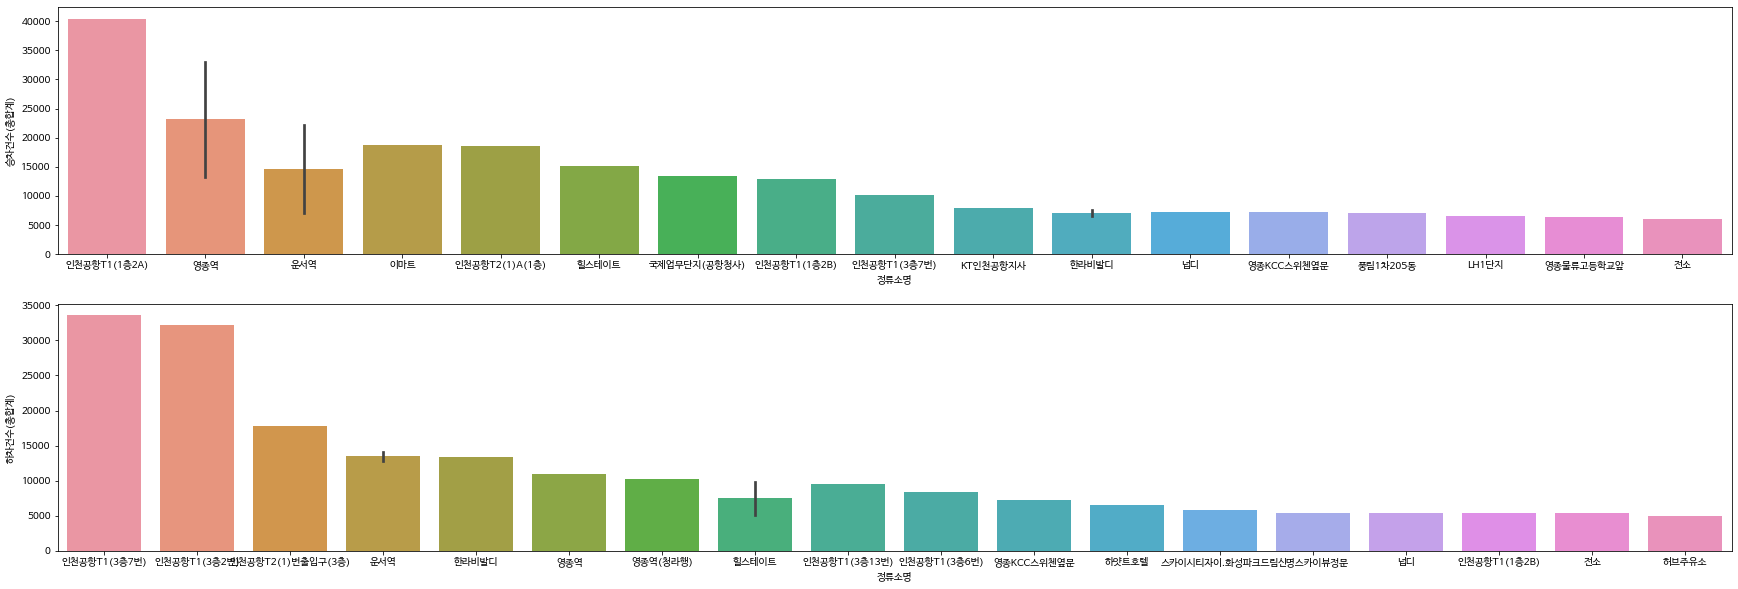

In [ ]:
col_n = 1
row_n = 2

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

sns.barplot(x=top20_up["정류소명"], y=top20_up['승차건수(총합계)'],ax=ax[0])
sns.barplot(x=top20_down["정류소명"], y=top20_down['하차건수(총합계)'],ax=ax[1])

In [ ]:
top20_up = bus_yj_[~bus_yj_['정류소명'].str.contains("인천공항", na=False, case=False)]
top20_up = top20_up[~top20_up['정류소명'].str.contains("무의도", na=False, case=False)]
top20_up = top20_up[~top20_up['정류소명'].str.contains("인천출입국", na=False, case=False)]
top20_up = top20_up[~top20_up['정류소명'].str.contains("공항청사", na=False, case=False)]
top20_up = top20_up[~top20_up['정류소명'].str.contains("이마트", na=False, case=False)]


top20_up = top20_up.sort_values('승차건수(총합계)', ascending=False)[:20]
top20_up = top20_up.reset_index(drop=True)
top20_up

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,영종동,영종역,35566.0,33040,598,32604,598,436,1121,157859.8240,126.524154,445680.9062,37.512390,1
1,중구,운서동,운서역,35242.0,22128,12853,21762,12853,366,1166,155098.7629,126.493049,443647.3451,37.493938,1
2,중구,영종동,힐스테이트,35457.0,15180,9868,14960,9868,220,835,161353.2967,126.563799,443162.0092,37.489848,1
3,중구,영종동,영종역,35567.0,13314,10893,13143,10893,171,807,157826.5639,126.523779,445651.5764,37.512124,1
4,중구,영종동,한라비발디,35459.0,7515,2638,7350,2638,165,338,161210.9943,126.562183,443285.9022,37.490958,1
5,중구,영종동,넙디,35575.0,7254,1430,7121,1430,133,289,156345.5068,126.507207,442628.7298,37.484820,1
6,중구,영종1동,영종KCC스위첸옆문,35756.0,7252,512,7162,512,90,259,160405.3825,126.553058,443573.7473,37.493517,1
7,중구,운서동,운서역,35257.0,7156,14073,6997,14073,159,708,155092.7930,126.492980,443671.0824,37.494151,1
8,중구,운서동,풍림1차205동,35256.0,7064,3373,6979,3373,85,348,154199.4697,126.482873,443776.4093,37.495056,1
9,중구,영종동,한라비발디,35460.0,6640,13328,6421,13328,219,666,161252.7823,126.562660,443197.3821,37.490163,1


In [ ]:
top20_down = bus_yj_.sort_values('하차건수(총합계)', ascending=False)[:20]
top20_down = top20_down.reset_index(drop=True)
top20_down

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도
0,중구,운서동,인천공항T1(3층7번),35203.0,10154,33549,10061,33549,93,1457,151420.7697,126.451789,438677.6552,37.448976
1,중구,운서동,인천공항T1(3층2번),35032.0,2724,32258,2709,32258,15,1166,151595.2163,126.453757,438728.9738,37.449448
2,중구,영종동,인천공항T2(1)번출입구(3층),35614.0,2216,17860,2205,17860,11,669,149698.5933,126.432185,440753.0644,37.467583
3,중구,운서동,운서역,35257.0,7156,14073,6997,14073,159,708,155092.7930,126.492980,443671.0824,37.494151
4,중구,영종동,한라비발디,35460.0,6640,13328,6421,13328,219,666,161252.7823,126.562660,443197.3821,37.490163
5,중구,운서동,운서역,35242.0,22128,12853,21762,12853,366,1166,155098.7629,126.493049,443647.3451,37.493938
6,중구,영종동,영종역,35567.0,13314,10893,13143,10893,171,807,157826.5639,126.523779,445651.5764,37.512124
7,중구,영종동,영종역(청라행),35620.0,62,10230,62,10230,0,343,157830.5372,126.523824,445653.1447,37.512138
8,중구,영종동,힐스테이트,35457.0,15180,9868,14960,9868,220,835,161353.2967,126.563799,443162.0092,37.489848
9,중구,영종동,인천공항T1(3층13번),35556.0,890,9494,806,9494,84,346,151236.0049,126.449715,438466.6024,37.447065


In [ ]:
top20_down = bus_yj_[~bus_yj_['정류소명'].str.contains("인천공항", na=False, case=False)]
top20_down = top20_down[~top20_down['정류소명'].str.contains("무의도", na=False, case=False)]
top20_down = top20_down[~top20_down['정류소명'].str.contains("을왕리", na=False, case=False)]
top20_down = top20_down[~top20_down['정류소명'].str.contains("인천출입국", na=False, case=False)]
top20_down = top20_down[~top20_down['정류소명'].str.contains("하얏트호텔", na=False, case=False)]

top20_down = top20_down.sort_values('하차건수(총합계)', ascending=False)[:20]
top20_down = top20_down.reset_index(drop=True)
top20_down

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,운서동,운서역,35257.0,7156,14073,6997,14073,159,708,155092.7930,126.492980,443671.0824,37.494151,1
1,중구,영종동,한라비발디,35460.0,6640,13328,6421,13328,219,666,161252.7823,126.562660,443197.3821,37.490163,1
2,중구,운서동,운서역,35242.0,22128,12853,21762,12853,366,1166,155098.7629,126.493049,443647.3451,37.493938,1
3,중구,영종동,영종역,35567.0,13314,10893,13143,10893,171,807,157826.5639,126.523779,445651.5764,37.512124,1
4,중구,영종동,영종역(청라행),35620.0,62,10230,62,10230,0,343,157830.5372,126.523824,445653.1447,37.512138,1
5,중구,영종동,힐스테이트,35457.0,15180,9868,14960,9868,220,835,161353.2967,126.563799,443162.0092,37.489848,1
6,중구,영종1동,영종KCC스위첸옆문,35755.0,564,7182,537,7182,27,258,160349.4902,126.552426,443570.4285,37.493485,1
7,중구,영종동,스카이시티자이.화성파크드림,35650.0,1812,5823,1754,5823,58,255,161035.1710,126.560190,443388.6693,37.491877,1
8,중구,영종동,신명스카이뷰정문,35455.0,5648,5460,5522,5460,126,370,160856.4549,126.558202,442758.7104,37.486193,1
9,중구,영종동,넙디,35574.0,1603,5426,1570,5426,33,234,156321.7993,126.506940,442611.7960,37.484666,1


In [ ]:
import folium


#지도 띄우기
m1 = folium.Map([37.483563, 126.491371], zoom_start = 13)

coords = []
for i in range(len(top20_up)-1):
    x = top20_up['경도'][i]
    y = top20_up['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#008000',
        fill = 'crimson',
        popup = top20_up['정류소명'][i]
    ).add_to(m1)

In [ ]:
coords = []
for i in range(len(top20_down)-1):
    x = top20_down['경도'][i]
    y = top20_down['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#000000',
        fill = 'crimson',
        popup = top20_down['정류소명'][i]
    ).add_to(m1)

In [ ]:
m1.save('/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안.html')
m1

## 정류장 승하차 하위 20

In [ ]:
down20_up = bus_yj_.sort_values('승차건수(총합계)', ascending=True)[:20]
down20_up = down20_up.reset_index(drop=True)
down20_up

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,운서동,하늘문화센터입구,35766.0,0,71,0,71,0,2,153811.9093,126.478508,443485.7427,37.492418,1
1,중구,영종동,인하국제의료센터,35643.0,0,3,0,3,0,0,152466.0948,126.463671,437603.9023,37.439356,1
2,중구,운서동,운서SKVIEW 스카이시티,35781.0,0,6,0,6,0,0,155985.6987,126.503156,442352.1099,37.482311,1
3,중구,영종동,논골경로당 입구,35771.0,0,34,0,34,0,1,158876.5672,126.535630,446095.0806,37.516167,1
4,중구,영종동,해송노인요양병원,35552.0,0,45,0,45,0,2,156815.2343,126.512306,446246.7624,37.517439,1
5,중구,영종동,잔다리삼거리,35856.0,0,5,0,5,0,0,159151.5573,126.538814,444772.4692,37.504263,1
6,중구,영종동,금호어울림2차,35598.0,0,17,0,17,0,1,156276.0276,126.506439,442333.0048,37.482152,1
7,중구,운서동,영종소방서,35765.0,0,9,0,9,0,0,148285.1327,126.416046,443064.4359,37.488329,1
8,중구,영종동,화물터미널,35039.0,0,253,0,253,0,8,153157.5830,126.471227,441650.3733,37.475849,1
9,중구,운서동,파라다이스시티역,35748.0,0,17,0,17,0,1,152099.8221,126.459535,437557.9456,37.438924,1


In [ ]:
down20_up = bus_yj_[~bus_yj_['정류소명'].str.contains("인천공항", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("인하국제의료", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("파라다이스시티", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("한국도심공항", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("미정차", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("화물터미널", na=False, case=False)]
down20_up = down20_up[~down20_up['정류소명'].str.contains("영종소방서", na=False, case=False)]


down20_up = down20_up.sort_values('승차건수(총합계)', ascending=True)[:20]
down20_up = down20_up.reset_index(drop=True)
down20_up

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,영종동,금호어울림2차,35598.0,0,17,0,17,0,1,156276.0276,126.506439,442333.0048,37.482152,1
1,중구,운서동,운서SKVIEW 스카이시티,35781.0,0,6,0,6,0,0,155985.6987,126.503156,442352.1099,37.482311,1
2,중구,영종동,논골경로당 입구,35771.0,0,34,0,34,0,1,158876.5672,126.535630,446095.0806,37.516167,1
3,중구,영종동,잔다리삼거리,35856.0,0,5,0,5,0,0,159151.5573,126.538814,444772.4692,37.504263,1
4,중구,운서동,하늘문화센터입구,35766.0,0,71,0,71,0,2,153811.9093,126.478508,443485.7427,37.492418,1
5,중구,영종동,해송노인요양병원,35552.0,0,45,0,45,0,2,156815.2343,126.512306,446246.7624,37.517439,1
6,중구,영종동,젓개마을입구,35398.0,1,0,1,0,0,0,156484.5010,126.508635,445054.4700,37.506682,1
7,중구,영종동,영종성당.정도사,35850.0,1,17,1,17,0,1,160420.4005,126.553186,444363.0183,37.500629,1
8,중구,운서동,인천시교육청 교육연수원,35782.0,1,10,1,10,0,0,156242.8924,126.506008,443287.4985,37.490750,1
9,중구,운서동,체육공원앞,35605.0,1,326,1,326,0,11,153669.2946,126.476916,443163.9503,37.489512,1


In [ ]:
down20_down = bus_yj_.sort_values('하차건수(총합계)', ascending=True)[:20]
down20_down = down20_down.reset_index(drop=True)
down20_down

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,영종동,금호어울림2차,35597.0,19,0,19,0,0,1,156308.9874,126.506811,442345.5439,37.482267,1
1,중구,운서동,거잠포회센터(미정차),35858.0,1,0,1,0,0,0,149110.9665,126.425879,435885.1701,37.423693,1
2,중구,영종동,영종주야간보호센터,35855.0,13,0,13,0,0,0,159748.6623,126.545585,444445.6155,37.501344,1
3,중구,영종동,인천공항전망대(미정차),35630.0,16,0,16,0,0,1,148983.7313,126.424234,438894.1840,37.450796,1
4,중구,영종동,인천공항T2-3층,35611.0,48,0,48,0,0,2,149971.9465,126.435262,440937.4706,37.469259,1
5,중구,운서동,운서SKVIEW 스카이시티,35780.0,2,0,2,0,0,0,155940.0611,126.502639,442368.5396,37.482457,1
6,중구,영종동,젓개마을입구,35398.0,1,0,1,0,0,0,156484.5010,126.508635,445054.4700,37.506682,1
7,중구,영종동,인천국제공항,35613.0,95,1,95,1,0,3,151370.1127,126.451219,438635.4719,37.448594,1
8,중구,영종동,인천공항T1-3층,35325.0,13,1,13,1,0,0,151349.5423,126.450987,438629.2049,37.448536,1
9,중구,운서동,체육공원앞,35606.0,322,1,318,1,4,11,153685.8031,126.477101,443196.9672,37.489810,1


In [ ]:
down20_down = bus_yj_[~bus_yj_['정류소명'].str.contains("인천국제공항", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("인천공항", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("화물터미널", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("인하국제", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("스태츠칩", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("미정차", na=False, case=False)]
down20_down = down20_down[~down20_down['정류소명'].str.contains("물류단지", na=False, case=False)]

down20_down = down20_down.sort_values('하차건수(총합계)', ascending=True)[:20]
down20_down = down20_down.reset_index(drop=True)
down20_down

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도,정류장수
0,중구,영종동,젓개마을입구,35398.0,1,0,1,0,0,0,156484.5010,126.508635,445054.4700,37.506682,1
1,중구,영종동,금호어울림2차,35597.0,19,0,19,0,0,1,156308.9874,126.506811,442345.5439,37.482267,1
2,중구,영종동,영종주야간보호센터,35855.0,13,0,13,0,0,0,159748.6623,126.545585,444445.6155,37.501344,1
3,중구,운서동,운서SKVIEW 스카이시티,35780.0,2,0,2,0,0,0,155940.0611,126.502639,442368.5396,37.482457,1
4,중구,운서동,하늘문화센터,35827.0,33,1,33,1,0,1,153276.6477,126.472427,443936.7404,37.496454,1
5,중구,운서동,체육공원앞,35606.0,322,1,318,1,4,11,153685.8031,126.477101,443196.9672,37.489810,1
6,중구,영종동,잔다리삼거리,35857.0,2,1,2,1,0,0,159140.0251,126.538684,444763.6300,37.504183,1
7,중구,운서동,햇내로공원입구,35777.0,28,2,28,2,0,1,155834.0671,126.501346,443950.4248,37.496704,1
8,중구,영종동,가재우물터,35678.0,2,2,2,2,0,0,160485.8941,126.553884,445151.5163,37.507736,1
9,중구,영종동,예단포물양장,35622.0,84,2,83,2,1,3,155918.5580,126.502072,447761.9083,37.531048,1


In [ ]:
bus_yj_.sort_values('일평균 승하차건수', ascending=True)[:50]

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도
4765,중구,운서동,인천공항충전소입구,35757.0,3,10,3,10,0,0,152270.6904,126.461120,442898.6913,37.487051
4504,중구,운서동,운서SKVIEW 스카이시티,35780.0,2,0,2,0,0,0,155940.0611,126.502639,442368.5396,37.482457
4505,중구,운서동,운서SKVIEW 스카이시티,35781.0,0,6,0,6,0,0,155985.6987,126.503156,442352.1099,37.482311
4755,중구,영종동,인천공항T1-3층,35325.0,13,1,13,1,0,0,151349.5423,126.450987,438629.2049,37.448536
5336,중구,영종동,중앙방앗간,35853.0,4,5,4,5,0,0,160005.9114,126.548499,444349.6937,37.500491
5335,중구,영종동,중앙방앗간,35852.0,2,3,2,3,0,0,160024.1177,126.548705,444356.8176,37.500556
4856,중구,운서동,인천시교육청 교육연수원,35782.0,1,10,1,10,0,0,156242.8924,126.506008,443287.4985,37.490750
4165,중구,운서동,영종소방서,35765.0,0,9,0,9,0,0,148285.1327,126.416046,443064.4359,37.488329
5802,중구,운서동,하늘문화센터입구,35767.0,6,4,6,4,0,0,153820.9238,126.478611,443483.5896,37.492399
5165,중구,영종동,젓개마을,35829.0,7,3,7,3,0,0,156507.8502,126.508898,445072.2054,37.506843


In [ ]:
import folium


#지도 띄우기
m2 = folium.Map([37.483563, 126.491371], zoom_start = 13)

coords = []
for i in range(len(down20_up)-1):
    x = down20_up['경도'][i]
    y = down20_up['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#008000',
        fill = 'crimson',
        popup = down20_up['정류소명'][i]
    ).add_to(m2)

In [ ]:
coords = []
for i in range(len(down20_down)-1):
    x = down20_down['경도'][i]
    y = down20_down['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#000000',
        fill = 'crimson',
        popup = down20_down['정류소명'][i]
    ).add_to(m2)

In [ ]:
m2.save('/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/down.html')
m2

In [ ]:
bus_yj_

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도
61,중구,운서동,KT인천공항지사,35095.0,324,84,314,84,10,14,154875.6093,126.490541,443406.8490,37.491760
62,중구,운서동,KT인천공항지사,35109.0,7863,2975,7372,2975,491,361,154855.7604,126.490305,443588.4114,37.493395
352,중구,운서동,거잠포회센터(미정차),35858.0,1,0,1,0,0,0,149110.9665,126.425879,435885.1701,37.423693
688,중구,운서동,공항고등학교,35116.0,3183,416,2920,416,263,120,154413.6324,126.485277,444047.0321,37.497505
690,중구,운서동,공항교회앞,35123.0,1082,1828,1067,1828,15,97,154616.5700,126.487550,444400.4681,37.500699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,중구,영종1동,e편한세상영종오션하임,35674.0,1891,1279,1841,1279,50,106,161781.9647,126.568635,443368.2097,37.491724
107,중구,영종1동,e편한세상영종오션하임,35761.0,687,1108,681,1108,6,60,161732.0377,126.568077,443240.9915,37.490575
109,기타,영종1동,한신더휴테라스,35761.0,67,23,67,23,0,3,161732.0377,126.568077,443240.9915,37.490575
4140,중구,영종1동,영종KCC스위첸옆문,35755.0,564,7182,537,7182,27,258,160349.4902,126.552426,443570.4285,37.493485


In [ ]:
top = bus_yj_.sort_values('승차건수(총합계)', ascending=False)[:100]
top = top.reset_index(drop=True)
top

,권역_x,행정동 명,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,X 좌표,위도,Y 좌표,경도
0,중구,영종동,인천공항T1(1층2A),35344.0,40354,3260,39938,3260,416,1454,151599.2996,126.453803,438722.0012,37.449385
1,중구,영종동,영종역,35566.0,33040,598,32604,598,436,1121,157859.8240,126.524154,445680.9062,37.512390
2,중구,운서동,운서역,35242.0,22128,12853,21762,12853,366,1166,155098.7629,126.493049,443647.3451,37.493938
3,중구,운서동,이마트,35207.0,18710,3045,18584,3045,126,725,152018.0363,126.458600,437722.1433,37.440399
4,중구,영종동,인천공항T2(1)A(1층),35618.0,18628,35,18513,35,115,622,149685.5353,126.432037,440761.8175,37.467661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,중구,영종동,영종하늘도서관,35586.0,990,1146,944,1146,46,71,161449.1352,126.564854,443704.2805,37.494738
96,중구,운서동,삼목초등학교,35310.0,925,1316,918,1316,7,75,154413.3312,126.485257,444324.0022,37.500000
97,중구,영종동,영종하늘도서관,35585.0,915,1005,894,1005,21,64,161424.6396,126.564576,443725.5811,37.494929
98,중구,영종동,영종교회,35545.0,907,658,865,658,42,52,159416.9444,126.541883,443552.1412,37.493280


In [ ]:
import folium


#지도 띄우기
m3 = folium.Map([37.483563, 126.491371], zoom_start = 13)

coords = []
for i in range(len(top)-1):
    x = top['경도'][i]
    y = top['위도'][i]
    coords.append([x, y])

for i in range(len(coords)-1):
    folium.Circle(
        location = coords[i],
        radius = 50,
        color = '#008000',
        fill = 'crimson',
        popup = top['정류소명'][i]
    ).add_to(m3)

m3

## 정류장 승하차 조합(상위 20)

In [ ]:
upcol = top20_up['정류소명'][:10].unique()
downcol = top20_down['정류소명'][:10].unique()

In [ ]:
import itertools as it
import numpy as np

array = np.array([1, 2, 3])
array2 = np.array(['a','b','c'])


combinations = it.product(upcol, downcol)

for combination in combinations:
    print(combination)

('영종역', '운서역')
('영종역', '한라비발디')
('영종역', '영종역')
('영종역', '영종역(청라행)')
('영종역', '힐스테이트')
('영종역', '영종KCC스위첸옆문')
('영종역', '스카이시티자이.화성파크드림')
('영종역', '신명스카이뷰정문')
('영종역', '넙디')
('운서역', '운서역')
('운서역', '한라비발디')
('운서역', '영종역')
('운서역', '영종역(청라행)')
('운서역', '힐스테이트')
('운서역', '영종KCC스위첸옆문')
('운서역', '스카이시티자이.화성파크드림')
('운서역', '신명스카이뷰정문')
('운서역', '넙디')
('힐스테이트', '운서역')
('힐스테이트', '한라비발디')
('힐스테이트', '영종역')
('힐스테이트', '영종역(청라행)')
('힐스테이트', '힐스테이트')
('힐스테이트', '영종KCC스위첸옆문')
('힐스테이트', '스카이시티자이.화성파크드림')
('힐스테이트', '신명스카이뷰정문')
('힐스테이트', '넙디')
('한라비발디', '운서역')
('한라비발디', '한라비발디')
('한라비발디', '영종역')
('한라비발디', '영종역(청라행)')
('한라비발디', '힐스테이트')
('한라비발디', '영종KCC스위첸옆문')
('한라비발디', '스카이시티자이.화성파크드림')
('한라비발디', '신명스카이뷰정문')
('한라비발디', '넙디')
('넙디', '운서역')
('넙디', '한라비발디')
('넙디', '영종역')
('넙디', '영종역(청라행)')
('넙디', '힐스테이트')
('넙디', '영종KCC스위첸옆문')
('넙디', '스카이시티자이.화성파크드림')
('넙디', '신명스카이뷰정문')
('넙디', '넙디')
('영종KCC스위첸옆문', '운서역')
('영종KCC스위첸옆문', '한라비발디')
('영종KCC스위첸옆문', '영종역')
('영종KCC스위첸옆문', '영종역(청라행)')
('영종KCC스위첸옆문', '힐스테이트')
('영종KCC스위첸옆문', '영종KCC스위첸

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (47.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')